<a href="https://colab.research.google.com/github/LiviaCavalcanti/RecInfo/blob/master/lab02/colab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
 # nltk.download('punkt') # run if it's the first time

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
import pandas 
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt

In [6]:
url = "https://raw.githubusercontent.com/LiviaCavalcanti/RecInfo/master/lab02/results.csv"
original_data = pandas.read_csv(url)
original_data.head()

,title,subtitle,author,date,section,text,url
0,“A sociedade foi Rubens Paiva não os facínora...,A decisão da juíza que proíbe as Forças Armada...,F. M.,30/03/2019 00:11:08,Brasil,A juíza federal Ivani Silva da Luz de Brasíli...,https://brasil.elpais.com/brasil/2019/03/26/po...
1,Justiça suspende decisão que proibia Forças Ar...,Liminar havia sido concedida na sexta-feira a ...,Marina Rossi,30/03/2019 16:17:59,Brasil,Menos de 24 horas depois de a juíza federal Iv...,https://brasil.elpais.com/brasil/2019/03/30/po...
2,Governo Bolsonaro prega “negacionismo históric...,Marcos Napolitano professor da USP diz que o...,Regiane Oliveira,04/04/2019 22:37:48,Brasil,Quando determinou que de 31 de março 1964 u...,https://brasil.elpais.com/brasil/2019/04/05/po...
3,Quando os pais de Gabo perceberam que tinham u...,Gustavo Tatis percorre o universo de García Má...,Jesús Ruiz Mantilla,07/03/2019 16:38:56,Cultura,Quando era pequeno Luisa e Gabriel se preo...,https://brasil.elpais.com/brasil/2019/03/06/cu...
4,Rádios canadenses banem músicas de Michael Jac...,Quebec Cogeco Media toma a decisão após queixa...,Jaime Porras Ferreyra,07/03/2019 16:12:37,Cultura,Desde a manhã da última segunda-feira e ...,https://brasil.elpais.com/brasil/2019/03/06/cu...


In [26]:
corpus_news = original_data.loc[:,['text']]
amount_doc = len(corpus_news.text)
corpus_news.text = corpus_news.text.apply(lambda x: re.sub(r'[,\.:;1-9"]', ' ', x))
corpus_news.head()

,text
0,A juíza federal Ivani Silva da Luz de Brasíli...
1,Menos de horas depois de a juíza federal Iv...
2,Quando determinou que de de março u...
3,Quando era pequeno Luisa e Gabriel se preo...
4,Desde a manhã da última segunda-feira e ...


In [0]:
# corpus_news = corpus_news["text"].str.split(" ", expand = True)
# corpus_words = pandas.DataFrame(corpus_news.values.ravel('F')).dropna()
# corpus_words.columns = ['words']

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

corpus_words["words"] = corpus_words.words.apply(lambda tokens: nltk.word_tokenize(tokens))

In [16]:
corpus_words.head()

,words
0,[A]
1,[Menos]
2,[Quando]
3,[Quando]
4,[Desde]


In [23]:
 str.punctuation


AttributeError: ignored

In [34]:

letters_words = pandas.DataFrame(treated_words.words.apply(lambda word: tokenizer.tokenize(word.lower())))
treated_words = pandas.DataFrame(letters_words.words.apply(lambda tokens: max(tokens, key=len)if len(tokens) >= 1 else np.nan).dropna())
treated_words.head()

,words
116,o
117,uma
118,gabriel
119,a
120,apesar
123,o
124,uma
125,os
126,a
127,para


In [0]:
df = treated_words
df = pandas.DataFrame(treated_words['words'].value_counts())
df.reset_index(level=0, inplace=True)
df.columns = ["words", "frequency"]

In [0]:

wd_occurrences = df["frequency"].sum()
vocab_size = len(df)
words1K = len(df[df["frequency"]>1000])
words1 = len(df[df["frequency"]>1])

In [46]:
pandas.DataFrame({"Total documents": [amount_doc], "Total word occurrences": [wd_occurrences], "Vocabulary size": [vocab_size], "Words occurring > 1000 times": [words1K], "Words occurring once": [words1]}).melt()


,variable,value
0,Total documents,249
1,Total word occurrences,212804
2,Vocabulary size,22475
3,Words occurring > 1000 times,24
4,Words occurring once,11479


In [0]:
df["probability"] = df["frequency"]/wd_occurrences
df["ranking"] = df.index
top50 = df[1:51]


In [47]:
top50

,words,frequency,probability,ranking
1,a,7355,0.034562,1
2,que,6554,0.030798,2
3,o,6481,0.030455,3
4,e,5705,0.026809,4
5,do,3463,0.016273,5
6,em,3380,0.015883,6
7,da,3012,0.014154,7
8,um,2698,0.012678,8
9,para,2322,0.010911,9
10,uma,2223,0.010446,10


In [0]:
%matplotlib inline


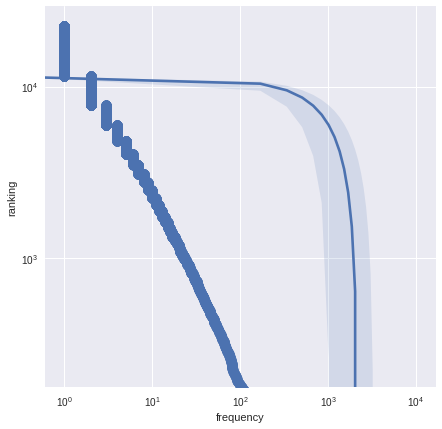

In [55]:
import seaborn as sns

f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("frequency", "ranking", df[["words", "frequency", "ranking"]], ax=ax, scatter_kws={"s": 100})
